In [1]:
import pandas as pd
import pyBigWig
import actc_seq
import tqdm
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from collections import Counter
from pylab import rcParams

# import combined dataset

In [2]:
inpath = '../../Data/CleanedExternalData/archive/'

NewDatasetCombine = pd.read_csv(inpath + 'DatasetCombine.csv')
NewDatasetCombine['chromosome'] = NewDatasetCombine['chromosome'].replace('chr24','chrY')
NewDatasetCombine['chromosome'] = NewDatasetCombine['chromosome'].replace('chr23','chrX')
NewDatasetCombine.head(3)

Target Gene Symbol chromosome        sgRNA Sequence  \
0              ACTR6      chr12  GCGAGCACATAGAGGGATCT   
1              ACTR6      chr12  GTCGAGCACATAGAGGGATC   
2              ACTR6      chr12  GCCTGCTTCGAGCACATAGA   

           sgRNA Context Sequence  sgRNA 'Cut' Position Strand of Target  \
0  TGCTTCGAGCACATAGAGGGATCTGGGCCC           100198288.0                +   
1  CTGCTTCGAGCACATAGAGGGATCTGGGCC           100198289.0                +   
2  GTCCACCTGCTTCGAGCACATAGAGGGATC           100198295.0                +   

   TSS Position  sgRNA 'Cut' Site TSS Offset  scaled_phenotype  \
0   100200816.0                      -2528.0          0.138377   
1   100200816.0                      -2527.0          0.074605   
2   100200816.0                      -2521.0          0.093977   

   orginal phenotype condition Domain DataSet  
0          -0.018881      K562   Kox1   Nunze  
1           0.009292      K562   Kox1   Nunze  
2           0.000734      K562   Kox1   Nunze

# ATAC data import
Raw data files can be downloaded from links in atacseq_links.xlsx

In [3]:
#atac_path = '/../../../../Comp Data Sets/ATACSeq/'
# atac_a549_bb = pyBigWig.open(atac_path+'A549/ENCFF808YMI.bigBed')
# atac_hct116_bb = pyBigWig.open(atac_path+'HCT116/ENCFF068PVP.bigBed')
# atac_k562_bb = pyBigWig.open(atac_path+'K562/ENCFF086JCJ.bigBed')
# atac_stomach_female_bb = pyBigWig.open(atac_path+'StomachFemale/ENCFF906PME.bigBed')
# atac_stomach_male_bb = pyBigWig.open(atac_path+'StomachMale/ENCFF762IFP.bigBed')
# atac_Panc1_bb = pyBigWig.open(atac_path+'Panc1/ENCFF882XTL.bigBed')
# atac_MCF7_bb = pyBigWig.open(atac_path+'MCF-7/ENCFF502RTI.bigBed')
# atac_GM12878_bb = pyBigWig.open(atac_path+'GM12878/ENCFF285BIH.bigBed')
# atac_HepG2_bb = pyBigWig.open(atac_path+'HepG2/ENCFF906NBO.bigBed')


atac_out = '../../Data/ATACseq/'
# chrtest_a549 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_a549_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position', 
#                                     chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_a549.to_csv(atac_out + 'ATAC_A549.csv', index = False)

# chrtest_hct116 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_hct116_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position',
#                                       chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_hct116.to_csv(atac_out + 'ATAC_HCT116.csv', index = False)

# chrtest_k562 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_k562_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position',
#                                       chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_k562.to_csv(atac_out + 'ATAC_K562.csv', index = False)

# chrtest_stomach_female = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_stomach_female_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position', 
#                                     chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_stomach_female.to_csv(atac_out + 'ATAC_StomachFemale.csv', index = False)

# chrtest_stomach_male = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_stomach_male_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position',
#                                       chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_stomach_male.to_csv(atac_out + 'ATAC_StomachMale.csv', index = False)

# chrtest_MCF7 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_MCF7_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position', 
#                                     chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_MCF7.to_csv(atac_out + 'ATAC_MCF7.csv', index = False)

# chrtest_Panc1 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_Panc1_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position',
#                                       chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_Panc1.to_csv(atac_out + 'ATAC_Panc1.csv', index = False)

# chrtest_HepG2 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_HepG2_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position',
#                                       chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_HepG2.to_csv(atac_out + 'chrtest_HepG2.csv', index = False)

# chrtest_GM12878 = actc_seq.ATACseq_run(actual_tiling= NewDatasetCombine, bigbed_df = atac_GM12878_bb, 
#                               sgrna_location_col = 'sgRNA \'Cut\' Position',
#                                       chromosome_col = 'chromosome', gene_col = 'Target Gene Symbol' )
# chrtest_GM12878.to_csv(atac_out + 'ATAC_GM12878.csv', index = False)

In [4]:
chrtest_k562 = pd.read_csv(atac_out + 'ATAC_K562.csv')
chrtest_k562 = chrtest_k562[abs(chrtest_k562['sgRNA \'Cut\' Site TSS Offset']) <= 5000]



# chrtest_hct116 = pd.read_csv(atac_out + 'ATAC_HCT116.csv')
# chrtest_a549 = pd.read_csv(atac_out + 'ATAC_A549.csv')
# chrtest_stomach_female = pd.read_csv(atac_out + 'ATAC_StomachFemale.csv')
# chrtest_stomach_male = pd.read_csv(atac_out + 'ATAC_StomachMale.csv' )
# chrtest_MCF7 = pd.read_csv(atac_out + 'ATAC_MCF7.csv' )
# chrtest_Panc1 = pd.read_csv(atac_out + 'ATAC_Panc1.csv' )
# chrtest_HepG2 = pd.read_csv(atac_out + 'chrtest_HepG2.csv' )
# chrtest_GM12878 = pd.read_csv(atac_out + 'ATAC_GM12878.csv' )

ess_noness = pd.read_csv('../../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
EssGene = ess_noness[ess_noness.Category == 'Essential']['Target Gene Symbol'].unique()


In [5]:
# make a dict of possible datasaets
DataSet = NewDatasetCombine.DataSet.unique()
Domain = NewDatasetCombine.Domain.unique()
Cellline = NewDatasetCombine.condition.unique()
from itertools import product
DatasetCombo = list(product(DataSet,Domain,Cellline))
def DatasetDictFunction(ATACdf):
    DatasetDict = dict()
    for combo in DatasetCombo:
        subset_data = ATACdf[(ATACdf.DataSet == combo[0]) 
                     & (ATACdf.Domain == combo[1]) 
                     & (ATACdf.condition == combo[2])]
        if len(subset_data) == 0:
            pass
        else:
            if combo[0] == 'InHouse':
                subset_data_ess = subset_data[subset_data['Target Gene Symbol'].isin(EssGene)]
                DatasetDict[combo] = subset_data_ess

            else:
                DatasetDict[combo] = subset_data
    return DatasetDict

In [6]:
DatasetDictK562 = DatasetDictFunction(chrtest_k562)
# DatasetDictHCT116 = DatasetDictFunction(chrtest_hct116)
# DatasetDictA549 = DatasetDictFunction(chrtest_a549)

# ATAC K562

### Pval_ATAC_InHouseA549Kox1

KDSR: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
BRIX1: Sample size in overlap or nonoverlap < 10
ATIC: Sample size in overlap or nonoverlap < 10


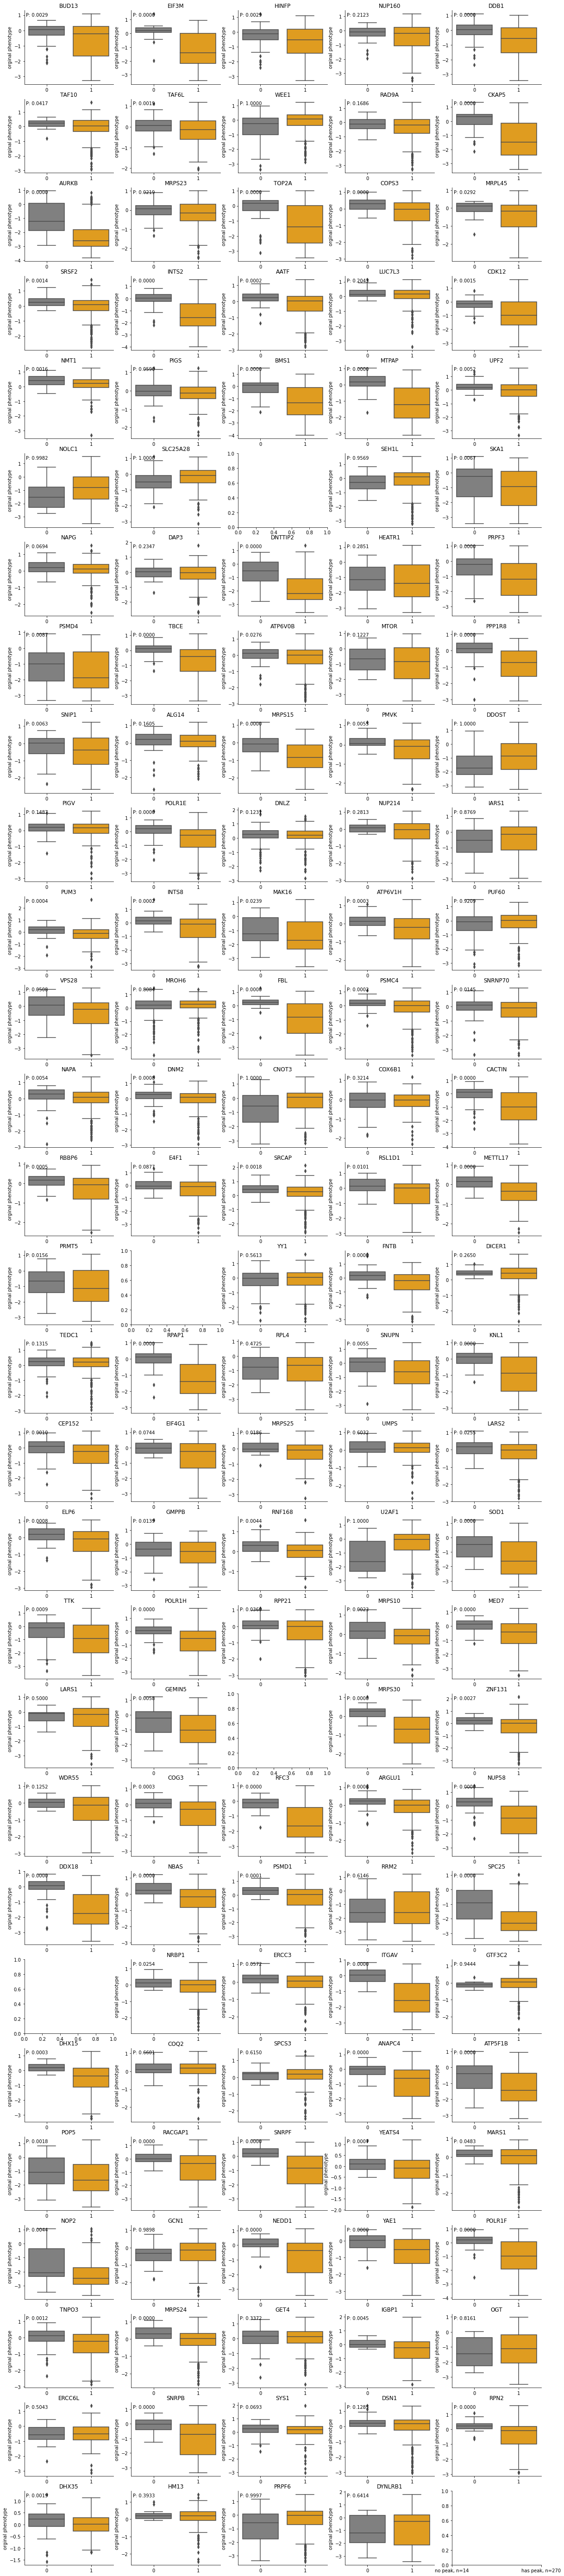

In [7]:
Pval_ATACK562_InHouseA549Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictK562[('InHouse', 'Kox1', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


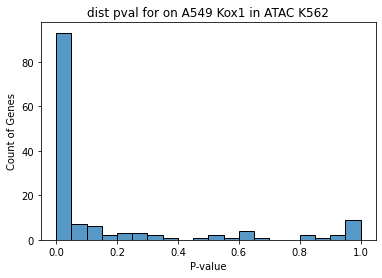

In [8]:
Pval_ATACK562_InHouseA549Kox1_df = pd.DataFrame(Pval_ATACK562_InHouseA549Kox1.items())
Pval_ATACK562_InHouseA549Kox1_df['cell'] = 'InHouseA549Kox1'
actc_seq.pval_agg(Pval_ATACK562_InHouseA549Kox1_df[1], 'dist pval for on A549 Kox1 in ATAC K562')

### ATAC_InHouseA549Zim3

KDSR: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
BRIX1: Sample size in overlap or nonoverlap < 10
ATIC: Sample size in overlap or nonoverlap < 10


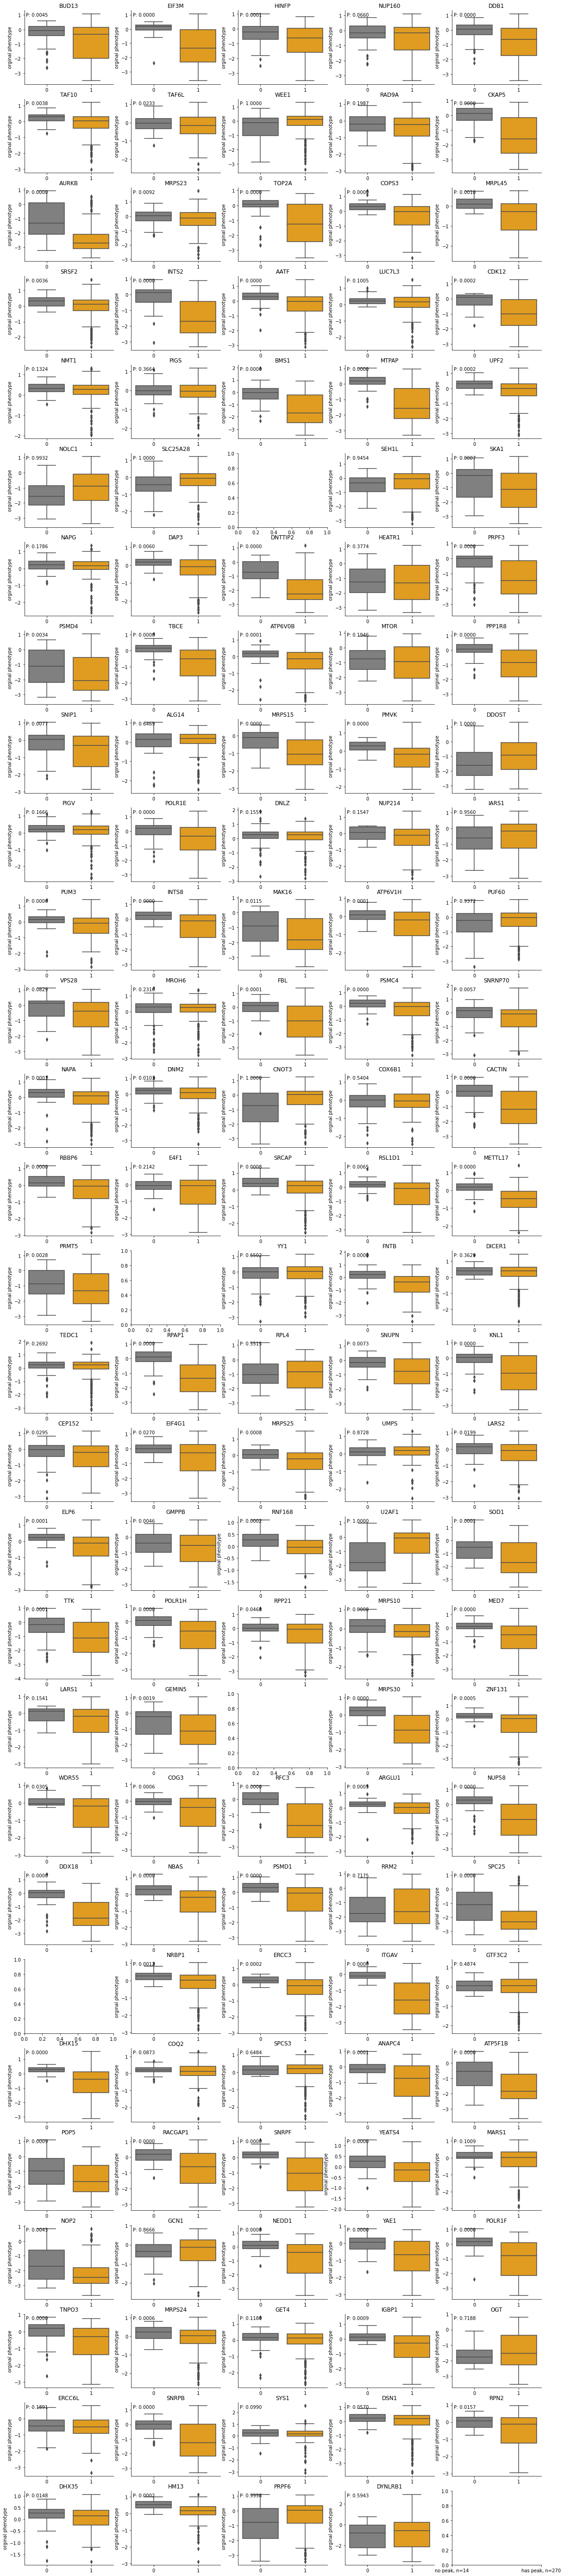

In [9]:
Pval_ATACK562_InHouseA549Zim3= actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictK562[('InHouse', 'Zim3', 'A549')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


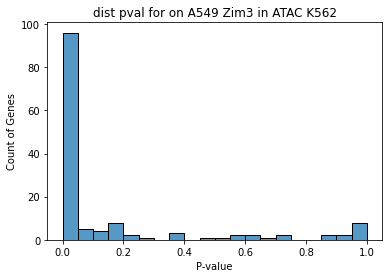

In [10]:
Pval_ATACK562_InHouseA549Zim3_df = pd.DataFrame(Pval_ATACK562_InHouseA549Zim3.items())
Pval_ATACK562_InHouseA549Zim3_df['cell'] = 'InHouseA549Zim3'
actc_seq.pval_agg(Pval_ATACK562_InHouseA549Zim3_df[1], 'dist pval for on A549 Zim3 in ATAC K562')

### InHouseHCT116Zim3

KDSR: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
BRIX1: Sample size in overlap or nonoverlap < 10
ATIC: Sample size in overlap or nonoverlap < 10


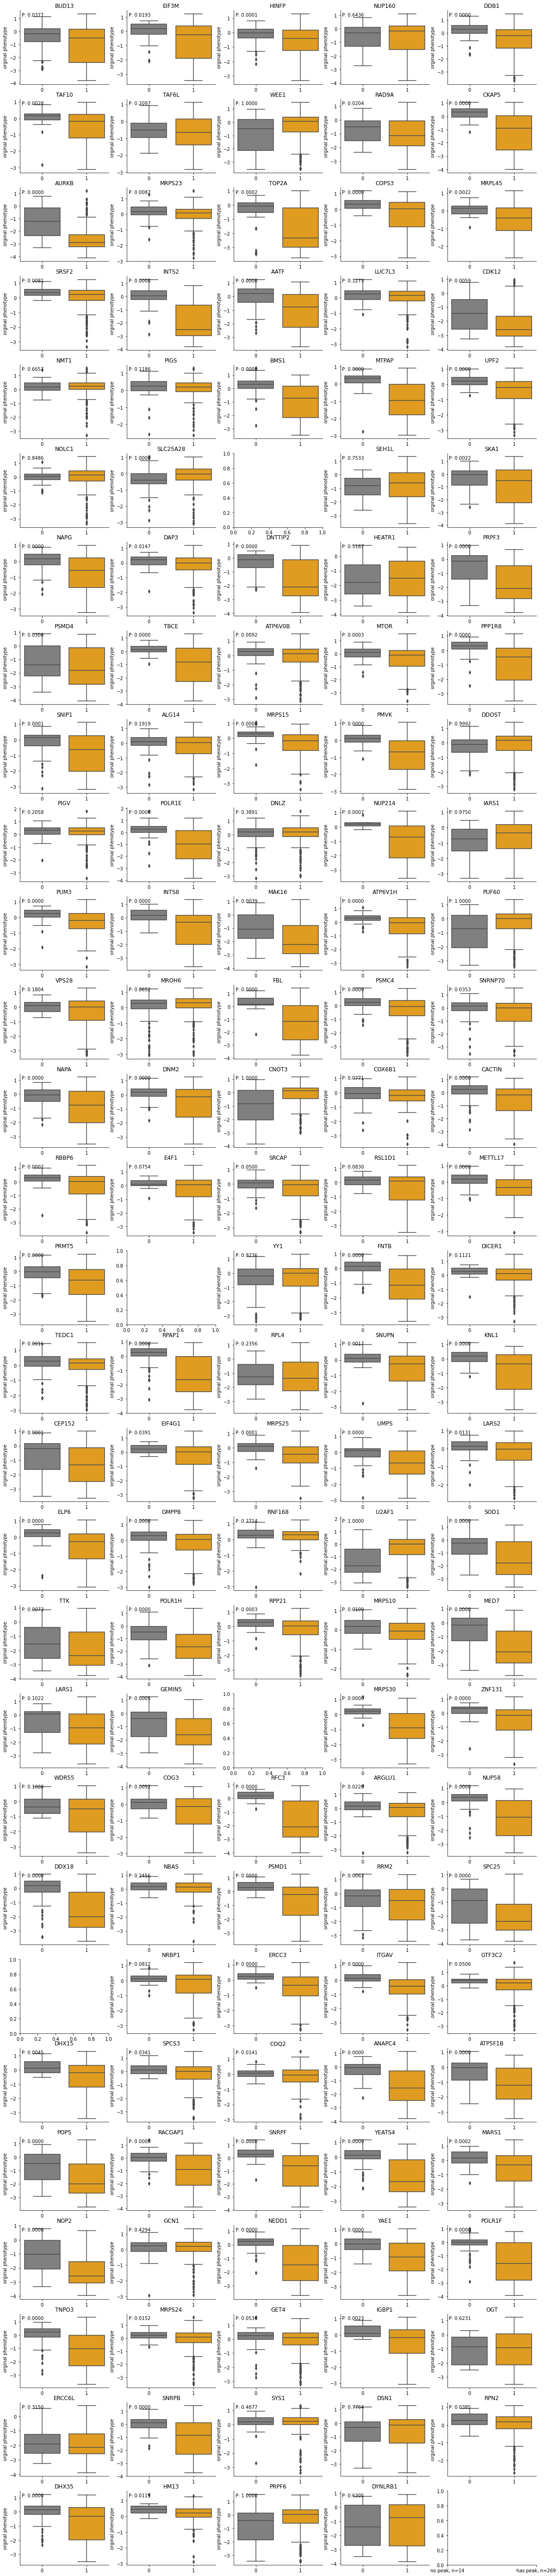

In [11]:
Pval_ATACK562_InHouseHCT116Zim3= actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictK562[('InHouse', 'Zim3', 'HCT116')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


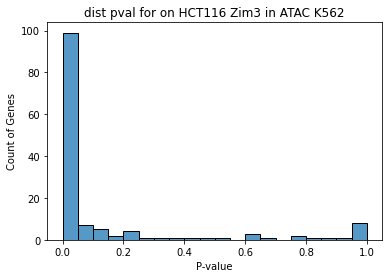

In [12]:
Pval_ATACK562_InHouseHCT116Zim3_df = pd.DataFrame(Pval_ATACK562_InHouseHCT116Zim3.items())
Pval_ATACK562_InHouseHCT116Zim3_df['cell'] = 'InHouseHCT116Zim3'
actc_seq.pval_agg(Pval_ATACK562_InHouseHCT116Zim3_df[1], 'dist pval for on HCT116 Zim3 in ATAC K562')

### InHouseHCT116Kox1

KDSR: Sample size in overlap or nonoverlap < 10
CEBPE: Sample size in overlap or nonoverlap < 10
BRIX1: Sample size in overlap or nonoverlap < 10
ATIC: Sample size in overlap or nonoverlap < 10


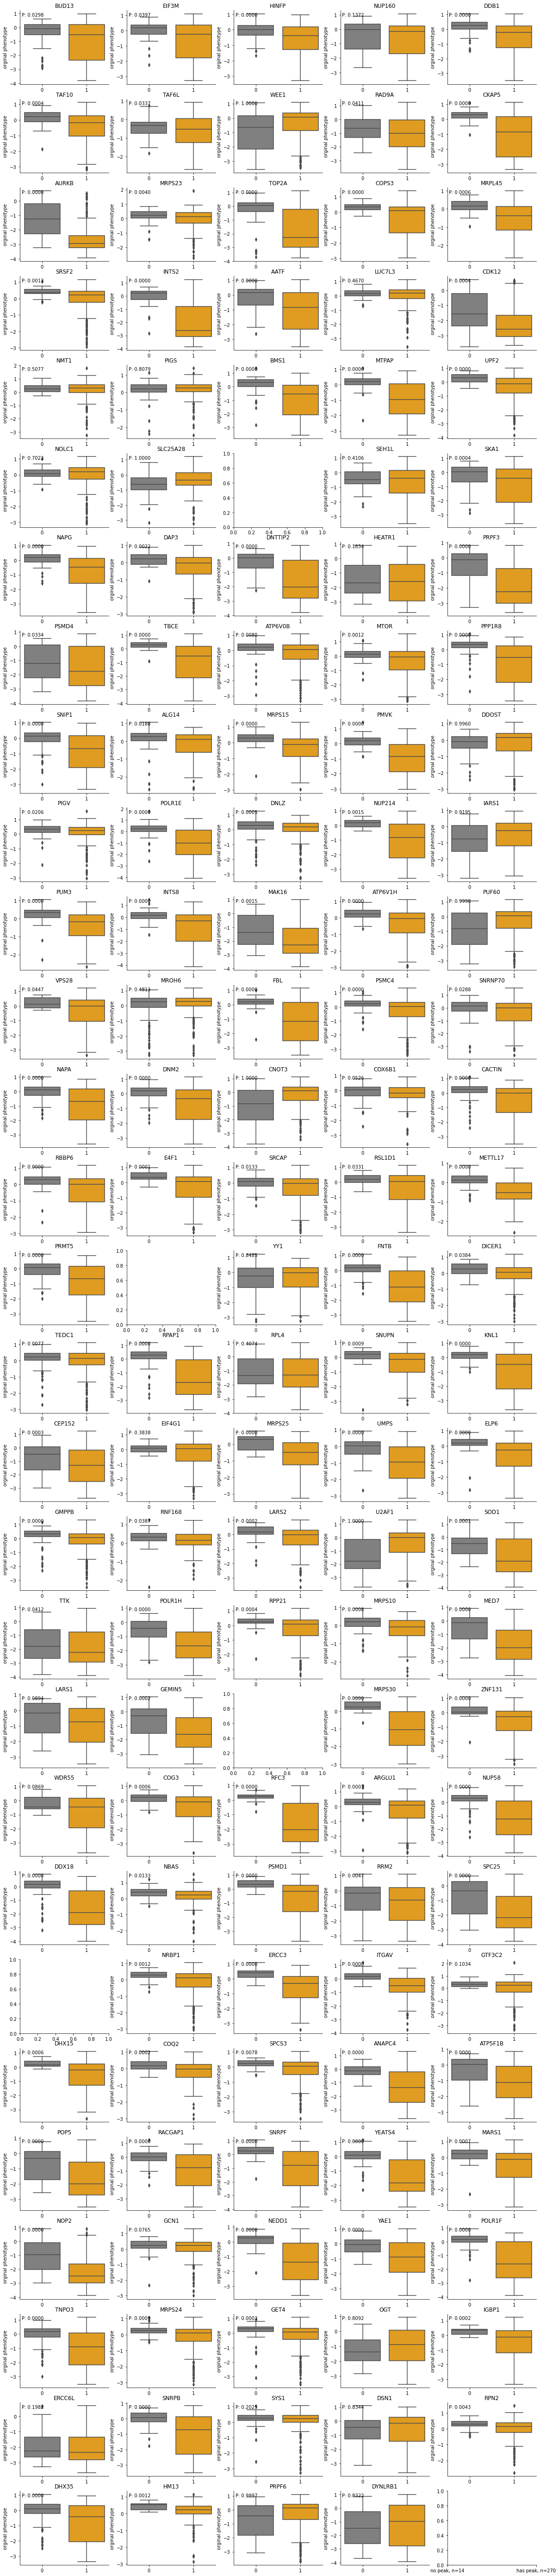

In [13]:
Pval_ATACK562_InHouseHCT116Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictK562[('InHouse', 'Kox1', 'HCT116')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


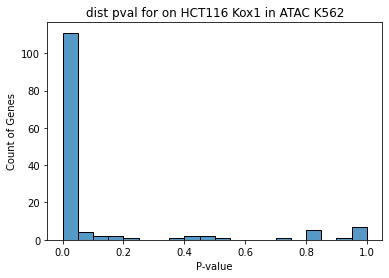

In [14]:
Pval_ATACK562_InHouseHCT116Kox1_df = pd.DataFrame(Pval_ATACK562_InHouseHCT116Kox1.items())
Pval_ATACK562_InHouseHCT116Kox1_df['cell'] = 'InHouseHCT116Kox1'
actc_seq.pval_agg(Pval_ATACK562_InHouseHCT116Kox1_df[1], 'dist pval for on HCT116 Kox1 in ATAC K562')

### NunezK562Kox1

CWF19L2: Sample size in overlap or nonoverlap < 10
EIF3M: Sample size in overlap or nonoverlap < 10
NLE1: Sample size in overlap or nonoverlap < 10
STAT5B: Sample size in overlap or nonoverlap < 10
DDX21: Sample size in overlap or nonoverlap < 10
SUPV3L1: Sample size in overlap or nonoverlap < 10
UTP25: Sample size in overlap or nonoverlap < 10
MED18: Sample size in overlap or nonoverlap < 10
FBL: Sample size in overlap or nonoverlap < 10
NIP7: Sample size in overlap or nonoverlap < 10
SCFD1: Sample size in overlap or nonoverlap < 10
SNW1: Sample size in overlap or nonoverlap < 10
LEO1: Sample size in overlap or nonoverlap < 10
COPB2: Sample size in overlap or nonoverlap < 10
DBR1: Sample size in overlap or nonoverlap < 10
MDN1: Sample size in overlap or nonoverlap < 10
VARS1: Sample size in overlap or nonoverlap < 10
CARF: Sample size in overlap or nonoverlap < 10
POLR1B: Sample size in overlap or nonoverlap < 10
VPS54: Sample size in overlap or nonoverlap < 10
MRPS35: Sample size in 

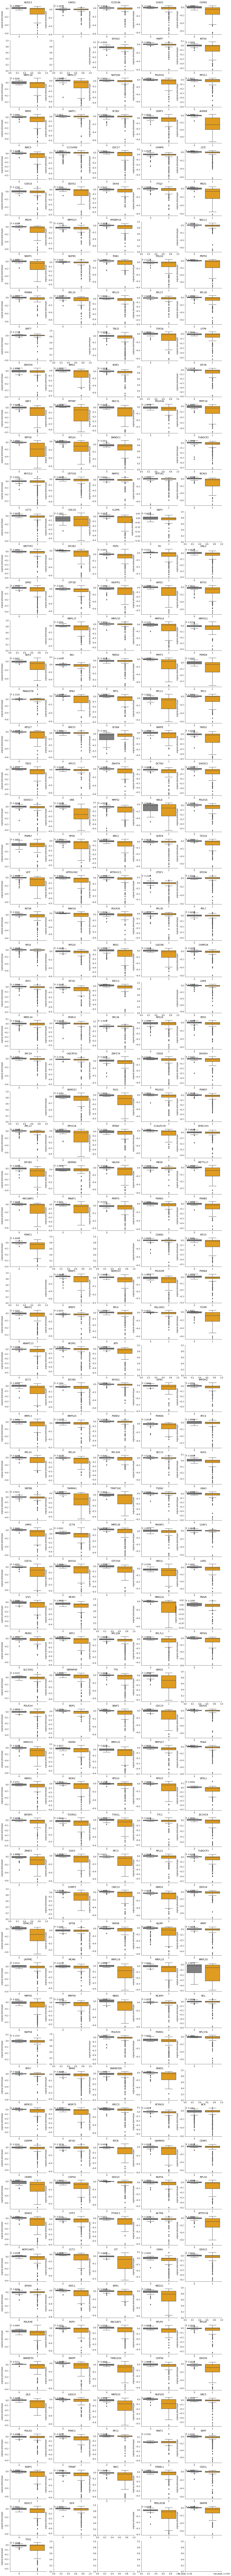

In [15]:
Pval_ATACK562_NunezK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictK562[('Nunze', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'no peak > peak' )


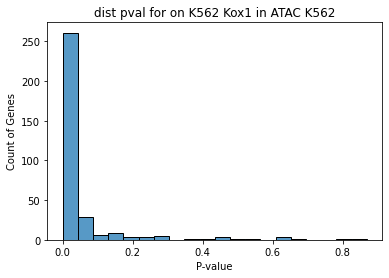

In [16]:
Pval_ATACK562_NunezK562Kox1_df = pd.DataFrame(Pval_ATACK562_NunezK562Kox1.items())
Pval_ATACK562_NunezK562Kox1_df['cell'] = 'NunezK562Kox1'
actc_seq.pval_agg(Pval_ATACK562_NunezK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC K562')

### GilbertK562Kox1

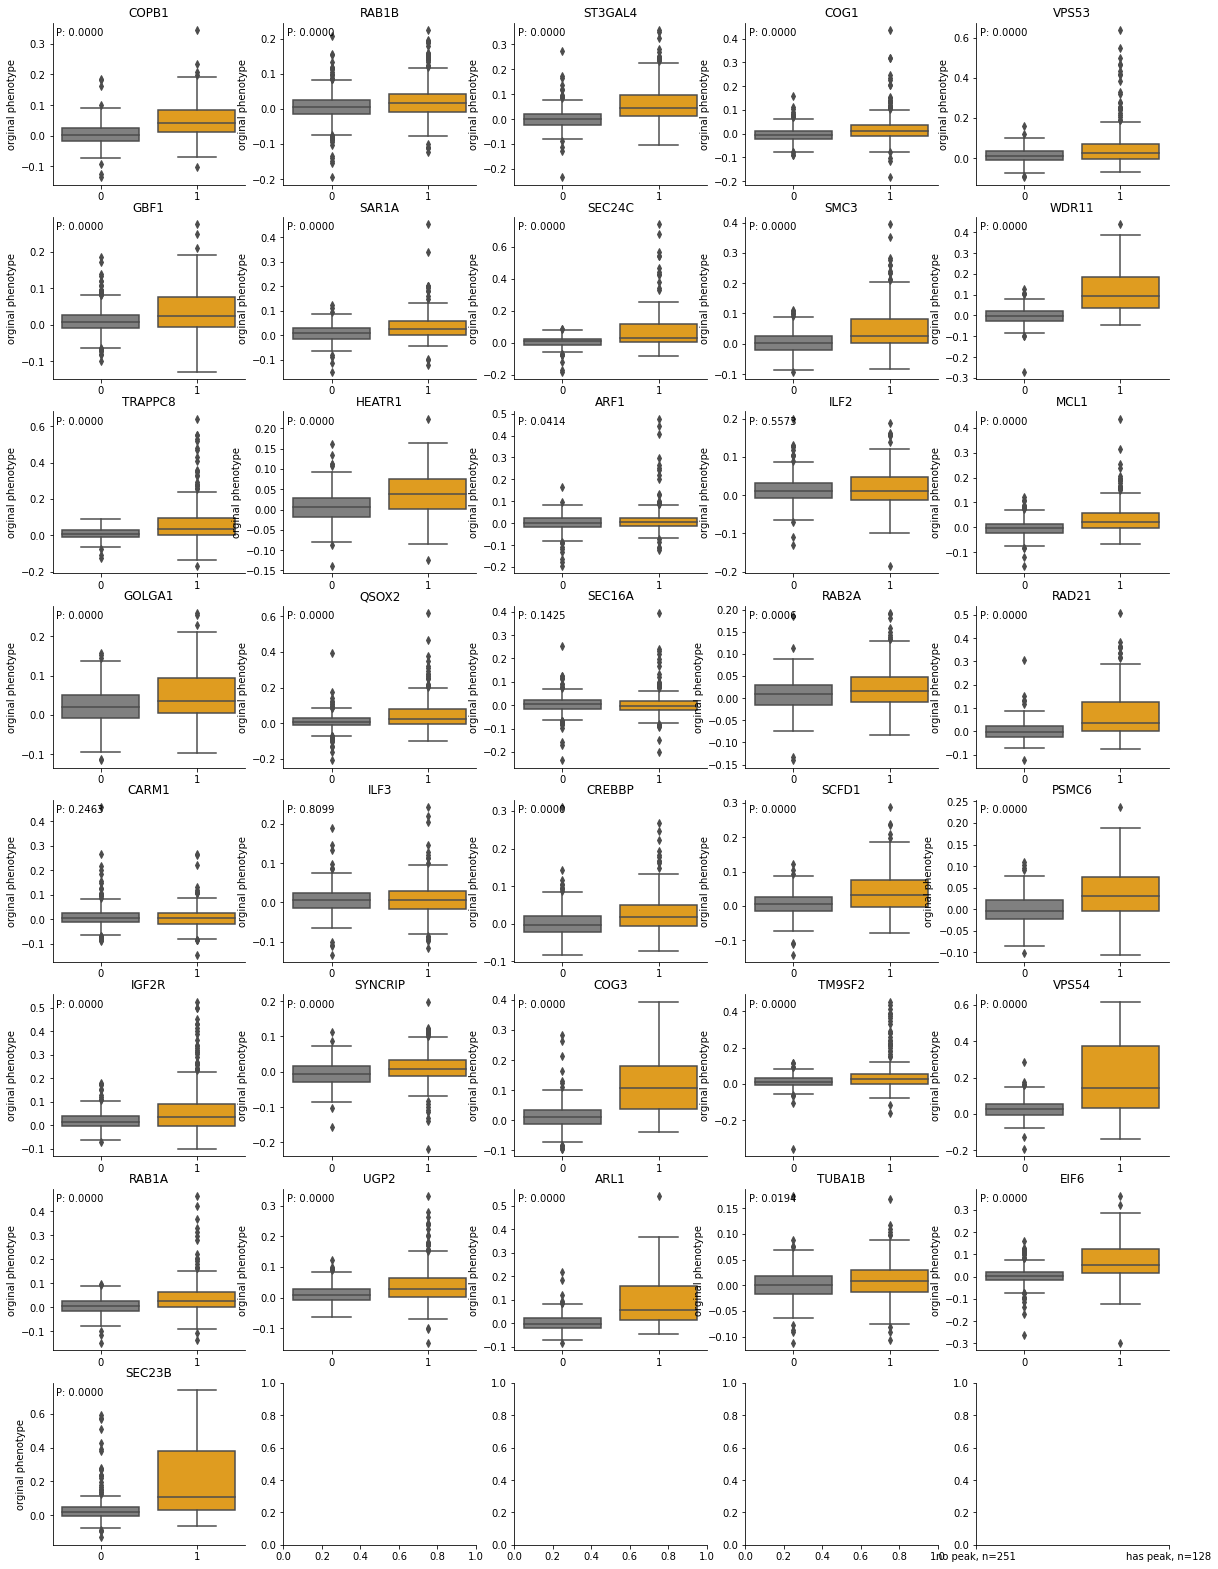

In [17]:
Pval_ATACK562_GilbertK562Kox1 = actc_seq.pvalue_overlap_comparison_boxplot(DatasetDictK562[('Gilbert', 'Kox1', 'K562')], 
                                                                       'orginal phenotype', 
                                              gene_col = 'Target Gene Symbol', 
                                      test_direction = 'two-sided' )


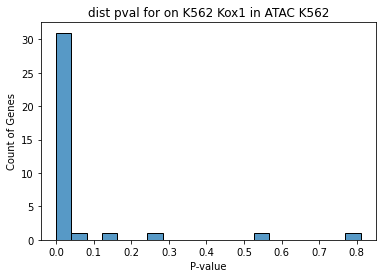

In [18]:
Pval_ATACK562_GilbertK562Kox1_df = pd.DataFrame(Pval_ATACK562_GilbertK562Kox1.items())
Pval_ATACK562_GilbertK562Kox1_df['cell'] = 'GilbertK562Kox1'
actc_seq.pval_agg(Pval_ATACK562_GilbertK562Kox1_df[1], 'dist pval for on K562 Kox1 in ATAC K562')

In [19]:
total_pval = pd.concat([Pval_ATACK562_InHouseA549Kox1_df,
           Pval_ATACK562_InHouseHCT116Kox1_df,
           Pval_ATACK562_InHouseHCT116Zim3_df,
           Pval_ATACK562_InHouseA549Zim3_df,
           Pval_ATACK562_GilbertK562Kox1_df,
           Pval_ATACK562_NunezK562Kox1_df])

total_pval.columns = ['Gene', 'Pval', 'DataSetID']
total_pval